# シグモイド関数とロジット変換

本稿ではシグモイド関数が確率を表す理由をまとめる。<br>
順を追って説明するためにまずは問題設定から始める。

## 設定

いま、我々は

★回帰モデルを使って確率を予測したい

としましょう。すなわち、回帰式
$$ y= f(\bm{x})=a_0 + a_1 * x_1 + a_2 * x_2 + \dots + a_n * x_n$$
を用いて確率$y$を予測する問題を考えます。

### 例）
身長と体重から「男性である確率」を予測する。<br>
すなわち、$y$を男性である確率とするとき
$$ y= a_0 + a_1 * (身長) + a_2 * (体重)$$
と表せるような問題を考えているとします。

## 回帰モデルで確率を扱う際の問題点

回帰式の特性上、（外れ値が入力されると）マイナス値や1を超えた値を取る可能性があります。<br>
上記の例では、日本人で学習を行った回帰モデルに対して身長200cm越え, 体重100Kg近くというNBA選手が入力値として与えられた場合、おそらく出力値は1を超えるでしょう。<br>

本来、回帰式は実数値全体を取りうるような問題と相性が良い手法です。<br>
そこで確率$y$に適切な変換を施して実数値全体をとるようにすれば良さそうです。そこで登場するのが***ロジット変換***です。

## ロジット変換

ロジット変換とは確率([0,1])から実数値全体への変換で定義式は
$$Z = {\bf{log}}\dfrac{p}{1-p}$$
です。<br>
グラフも確認してみましょう。確率(横軸、[0,1]の範囲)から実数値全体（縦軸）に変換されていることが分かります。

C:\Users\kuruz\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


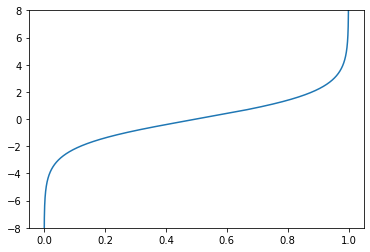

In [9]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def logit(x):
    return np.log((x/(1-x)))

x = np.arange(-1.0, 2.0, 0.0001)
y = logit(x)
plt.plot(x, y)
plt.ylim(-8.0,8.0)
plt.show()


この**ロジット変換後の値を回帰モデルで予測する**ことにすれば、回帰モデルを活かすことが出来ます。<br>
つまり問題設定を以下のように修正します。

### 設定（ロジット変換版）<br>
回帰式を使って**ロジット変換後の値**を予測する。式で表すと以下である：
$$ {\bf{log}}  \frac{y}{1-y} = f(\bm{x}) $$


今一度本来の目的を思い出しましょう。

我々が最終的に得たいのは確率 $y$ の値です。<br>
ですからロジット変換の逆変換を行って式を$y=...$ の形に整理しましょう。
$$ {\bf{log}}  \frac{y}{1-y} = f(\bm{x}) $$
$$ \frac{y}{1-y} = e^{f(\bm{x})} $$
$$ \frac{1}{\frac{1}{y}-1} = e^{f(\bm{x})} $$
$$ \frac{1}{y}-1 = e^{-f(\bm{x})} $$
$$ \frac{1}{y} = 1 + e^{-f(\bm{x})} $$
$$ y = \frac{1}{1 + e^{-f(\bm{x})}} $$

最後の式を **ロジスティック関数（またはロジット関数）** といいます。<br>
また$ f(\bm{x}) = x $ すなわち $ y = \frac{1}{1 + e^{-x}} $をとくに **シグモイド関数（または標準ロジスティック関数）** といいます。

$y$は元々確率を表す変数なのでロジスティック関数（もちろんシグモイド関数も）確率を表す関数と言えるわけです。<br>
また、ソフトマックス関数はシグモイド関数を多クラスに拡張しただけなので、こちらも確率を表す関数になります。

## 勉強会での問いに対する答え

「なぜ確率を出力する関数としてシグモイド関数をつかうのか？」ですが、<br>
**連続値を確率に変換する関数であるシグモイド関数を使うのが自然** という理由なのかなと思います。